In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("../data/preprocessed_data.csv")
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143,1.713608e+06,3958226.0,480970.0,18033.333333,45574,1471
1,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448,2.419552e+06,7003748.0,402885.0,8378.864811,27451,1324
2,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384,2.159255e+06,6582365.0,344173.0,18964.178862,207849,1764
3,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250,1.111062e+06,4274628.0,124775.0,9658.552326,41789,687
4,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415,5.394150e+05,2400821.0,182202.0,1524.144578,4867,384


In [3]:
def apply_log(df, column_names):
    for column_name in column_names:
        df[column_name] = df.apply(lambda row: np.log2(row[column_name]) if row[column_name] != 0 else row[column_name], axis=1)

In [4]:
numerical_features = ['view_count', 'dislikes', 'comment_count', 'days_uploaded', 'title_length', 'channel_title_mean_views', 'channel_title_min_views', 'channel_title_max_views', 'tags_count', 'channel_title_mean_comments', 'channel_title_min_comments', 'channel_title_max_comments']
categorical_features = ['categoryId', 'image_popularity', 'text_popularity']
target = 'likes'

In [5]:
numerical_features.append(target)
apply_log(df, numerical_features)
numerical_features.remove(target)

In [6]:
features = []
features.extend(numerical_features)
features.extend(categorical_features)

In [7]:
X = df[features]
X

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity
0,20.530519,9.443852,15.107912,0.000000,5.087463,20.708606,18.875587,21.916423,7.159871,14.138378,10.522582,15.475923,22,1,2
1,21.183553,10.096886,14.014456,0.000000,5.906891,21.206308,18.620009,22.739696,8.807355,13.032539,10.370687,14.744571,20,1,0
2,20.959326,9.872659,15.295661,0.000000,5.727920,21.042102,18.392774,22.650175,8.584963,14.210989,10.784635,17.665176,24,3,0
3,18.922221,7.835554,12.900678,0.000000,5.807355,20.083507,16.928969,22.027367,7.965784,13.237591,9.424166,15.350836,10,1,1
4,20.100068,9.013401,11.100662,0.000000,5.781360,19.041036,17.475179,21.195096,8.696968,10.573784,8.584963,12.248817,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245898,19.103856,8.017189,10.831307,2.807355,5.087463,19.240278,17.561907,20.213334,8.005625,12.432614,10.333155,13.854771,23,1,1
245899,21.218798,10.132131,12.508785,2.807355,5.321928,21.845931,18.395120,23.772112,4.700440,14.775480,10.736402,16.271682,20,1,2
245900,18.855541,6.518421,8.422065,2.584963,6.339850,19.662608,16.964792,22.307505,8.826548,10.471738,6.686501,13.147523,17,2,3
245901,19.617442,8.530775,10.945444,2.584963,5.554589,23.416360,18.060005,25.406218,3.700440,14.469762,10.288866,16.320007,24,1,2


In [8]:
y = df[target]
y

0         17.259559
1         17.162893
2         18.432522
3         14.505005
4         15.483123
            ...    
245898    16.072572
245899    16.800205
245900    12.484319
245901    14.850382
245902    15.707009
Name: likes, Length: 245903, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196722, 15), (49181, 15), (196722,), (49181,))

In [10]:
model = XGBRegressor(n_estimators = 20000, max_depth = 8, learning_rate = 0.01, colsample_bytree = 0.6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [11]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train, pred_test

(array([17.126505 , 17.231945 , 18.422503 , ..., 16.298319 , 14.693271 ,
        14.1495495], dtype=float32),
 array([14.549639 , 14.9285345, 14.831526 , ..., 12.497235 , 15.065473 ,
        15.430809 ], dtype=float32))

In [12]:
print(f"Train RMSE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSE = 0.08144208003726801
Test RMSE = 0.3747740187907055


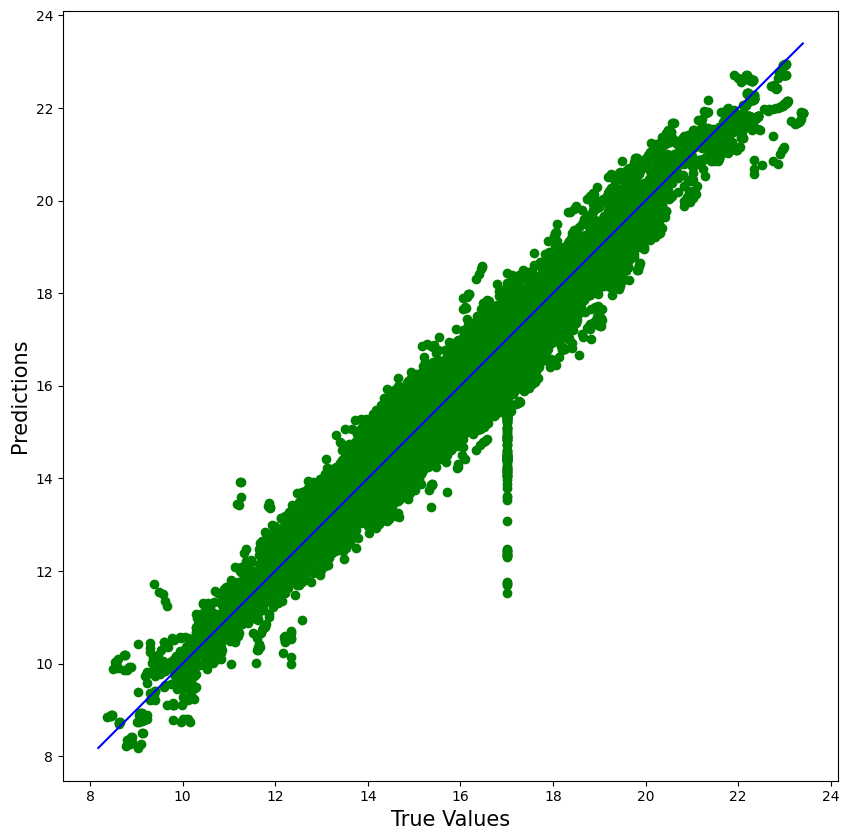

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='green')

p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Podaci koji se prosleđuju modelu nalaze se u fajlu [preprocessed_data.csv](../data/preprocessed_data.csv). Zbog velikog opsega vrednosti koji uzimaju atributi, prvo je isporbana normalzacija pomoću StandardScaler-a iz sklearn biblioteke, međutim dobijeni rezultati su bili dosta loši. Nakon toga je isprobano logaritmovanje vrednosti i to je dalo dosta bolje rezultate. Treća stvar koja je isprobana je normalizacija pomoću StandardScaler nad logaritmovanim podacima, međutim to je dalo iste rezultate kao kada je rađeno samo logaritmovanje pa StandardScaler nije primenjivan. 

#### Što se tiče kolone koje se prosleđuju modelu, isprobane su različite kombinacije i posmatralo se kako se smanjuje/povećava greška. Najbolji rezultati su dobijeni kada se modelu proslede svi atributi osim starosti kanala i dužine opisa video snimka.

#### Što se tiče hiperparametara modela, i tu su isprobavane različite vrednosti i odabrane su one koje daju najmanju grešku. Za broj iteracija su isprobavane vrednosti 1000, 5000, 10000, 20000, 30000 i primećeno je da se greška posle 20000 iteracije ne smanjuje, već se povećava ili ostaje ista što ukazuje na overfitovanje. Za max_depth su isprobavane vrednosti 10, 8 i 6 i vrednost 8 daje manju grešku, dok vrednost 10 daje istu grešku kao 8 ali su performanse gore. Learning rate je optimizovan zajedno sa brojem iteracijama, i 0.01 vrednost se pokazala kao najbolja. Za colsample_bytree su isprobane vrednosti 0.4, 0.5, 0.6 i 0.7 i najmanja greška je dobijena za 0.6.

## Analiza gresaka

In [14]:
test_with_pred_df = X_test
test_with_pred_df['prediction'] = pred_test
test_with_pred_df['actual_value'] = y_test
test_with_pred_df

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
196722,18.458130,7.371463,11.153552,1.000000,4.807355,19.810514,18.458130,20.656008,7.409391,12.270779,10.627534,13.880923,24,1,2,14.549639,14.598809
196723,19.627124,8.540457,10.690871,1.000000,5.129283,20.732051,18.540930,22.150533,8.682995,11.469154,8.442943,12.846078,24,1,2,14.928535,15.121291
196724,19.310810,8.224143,9.560333,0.000000,5.672425,20.347111,18.068169,22.737626,7.774787,11.620918,9.330917,14.037804,22,1,2,14.831526,14.554169
196725,20.148333,7.592761,11.856036,0.000000,6.643856,19.931823,17.002617,21.969564,7.159871,11.243445,8.247928,13.714460,17,2,3,13.709364,13.558660
196726,22.830969,11.744302,13.780950,1.584963,4.523562,22.140144,19.941194,23.319106,2.584963,13.467175,11.276124,14.216670,24,1,1,18.896349,18.817693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245898,19.103856,8.017189,10.831307,2.807355,5.087463,19.240278,17.561907,20.213334,8.005625,12.432614,10.333155,13.854771,23,1,1,15.533319,16.072572
245899,21.218798,10.132131,12.508785,2.807355,5.321928,21.845931,18.395120,23.772112,4.700440,14.775480,10.736402,16.271682,20,1,2,16.779016,16.800205
245900,18.855541,6.518421,8.422065,2.584963,6.339850,19.662608,16.964792,22.307505,8.826548,10.471738,6.686501,13.147523,17,2,3,12.497235,12.484319
245901,19.617442,8.530775,10.945444,2.584963,5.554589,23.416360,18.060005,25.406218,3.700440,14.469762,10.288866,16.320007,24,1,2,15.065473,14.850382


In [15]:
df2 = test_with_pred_df[abs(pow(2, test_with_pred_df['prediction']) - pow(2, test_with_pred_df['actual_value'])) * 100 / pow(2, test_with_pred_df['actual_value']) > 50]
df2

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
196757,17.347526,6.232239,8.430453,1.000000,5.285402,17.701216,17.347526,17.906626,5.426265,8.529821,8.430453,8.614710,20,1,2,12.807891,12.198138
196972,19.249516,8.162849,11.934428,0.000000,5.727920,21.128635,17.688100,22.956560,8.829723,13.020852,9.984418,15.093748,20,0,2,15.418261,14.711075
197135,20.106725,7.155311,10.080818,1.000000,5.087463,22.185843,20.106725,23.006971,2.584963,11.239897,10.080818,11.807757,15,2,3,13.856544,13.121210
197138,19.549459,8.462792,10.609179,1.000000,5.087463,20.211982,17.740453,22.313775,7.098032,12.448423,10.188589,15.338527,27,3,2,15.342109,14.746672
197194,19.363707,8.277040,11.992230,1.000000,5.727920,21.128635,17.688100,22.956560,8.829723,13.020852,9.984418,15.093748,20,0,2,15.371812,14.753060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245737,19.788870,8.702203,10.727920,1.584963,4.523562,21.372371,18.748425,22.805639,4.392317,13.355264,10.304922,14.928888,24,0,0,16.273458,15.595287
245747,18.914125,7.700658,9.581201,1.584963,5.426265,22.510584,18.489848,24.933899,2.584963,13.155004,9.002815,15.205755,10,3,2,14.330874,13.666557
245760,18.354262,7.267595,12.040632,1.584963,5.247928,18.225283,18.083630,18.354262,6.000000,11.942148,11.836445,12.040632,27,1,2,14.498399,13.905105
245845,19.892386,8.805719,11.727495,2.584963,5.700440,19.653624,19.299152,19.892386,2.000000,11.466076,11.138912,11.727495,23,2,2,15.853791,15.216329


In [16]:
df2.describe()

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,20.385381,8.989829,11.571222,1.845657,5.377496,20.652122,18.602091,21.928020,6.379502,12.075069,9.740675,13.424473,17.952109,0.987134,1.726590,15.912843,15.610828
std,2.120917,2.215546,3.458908,0.944970,0.740160,2.016526,1.639199,2.476027,2.313462,3.138085,3.279106,3.651013,7.483066,1.025164,0.837929,2.257028,2.326067
min,11.376125,0.289458,0.000000,0.000000,0.000000,13.700033,11.376125,14.441712,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.730059,8.487840
25%,18.893075,7.628967,10.571988,1.000000,5.000000,19.242701,17.585645,20.108097,4.700440,10.886078,9.047124,11.753426,10.000000,0.000000,1.000000,14.644293,14.219807
50%,19.989467,8.751489,11.718318,2.000000,5.426265,20.226439,18.214874,21.816688,7.066089,11.956558,10.149747,13.264589,20.000000,1.000000,2.000000,15.684619,15.387277
75%,21.441076,10.095516,13.263963,2.584963,5.882643,21.642929,19.186535,23.142595,8.426265,13.375561,11.281351,15.338527,24.000000,1.000000,2.000000,17.009878,17.000558
max,27.223752,16.137084,19.720141,5.169925,6.643856,25.988608,24.315920,28.049428,8.942515,19.096193,15.991898,22.684004,29.000000,3.000000,3.000000,22.721228,23.395681


In [17]:
df2.sort_values('view_count')

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
219192,11.376125,0.289458,6.087463,0.000000,5.247928,13.700033,11.376125,14.441712,7.781360,6.764872,6.087463,7.033423,10,0,1,10.010426,9.339850
223355,14.073305,2.986638,6.321928,0.000000,5.169925,19.352758,14.073305,19.760176,6.000000,8.535071,6.321928,9.779719,10,1,2,10.465230,9.586840
205382,15.553119,4.466452,7.087463,1.000000,5.930737,15.652498,14.767357,15.991190,8.810572,7.091700,6.643856,7.276124,10,3,0,11.519262,10.768184
205612,15.763186,4.676519,7.149747,1.584963,5.930737,15.652498,14.767357,15.991190,8.810572,7.091700,6.643856,7.276124,10,3,0,11.566884,10.883407
205851,15.892234,4.805567,7.219169,2.000000,5.930737,15.652498,14.767357,15.991190,8.810572,7.091700,6.643856,7.276124,10,3,0,11.605681,10.978710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245045,27.193444,16.106777,19.666195,3.906891,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.889675,23.387483
245248,27.201967,16.115300,19.668850,4.000000,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.891342,23.389907
245455,27.209463,16.122796,19.670020,4.087463,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.896547,23.391965
245664,27.216802,16.130134,19.671519,4.169925,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.889534,23.393872


In [18]:
df2.sort_values('dislikes')

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
219192,11.376125,0.289458,6.087463,0.000000,5.247928,13.700033,11.376125,14.441712,7.781360,6.764872,6.087463,7.033423,10,0,1,10.010426,9.339850
243547,17.180327,2.521941,0.000000,0.000000,5.523562,17.551062,17.180327,17.936989,4.523562,8.392624,0.000000,9.923327,25,1,3,9.880940,8.487840
243780,17.332439,2.573260,0.000000,1.000000,5.523562,17.551062,17.180327,17.936989,4.523562,8.392624,0.000000,9.923327,25,1,3,10.039987,8.539159
244271,17.347526,2.592522,0.000000,2.000000,5.523562,17.551062,17.180327,17.936989,4.523562,8.392624,0.000000,9.923327,25,1,3,10.000069,8.558421
244026,17.344044,2.592522,0.000000,1.584963,5.523562,17.551062,17.180327,17.936989,4.523562,8.392624,0.000000,9.923327,25,1,3,9.998896,8.558421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245045,27.193444,16.106777,19.666195,3.906891,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.889675,23.387483
245248,27.201967,16.115300,19.668850,4.000000,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.891342,23.389907
245455,27.209463,16.122796,19.670020,4.087463,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.896547,23.391965
245664,27.216802,16.130134,19.671519,4.169925,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.889534,23.393872


In [19]:
df2.sort_values('comment_count')

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
212627,16.428720,5.342053,0.000000,1.584963,5.169925,16.983856,16.356504,18.402088,6.643856,0.000000,0.000000,0.000000,20,0,2,12.628755,11.710376
235775,24.717275,9.322426,0.000000,1.584963,4.754888,23.309702,16.842829,25.675746,8.679480,0.000000,0.000000,0.000000,28,3,3,16.898579,15.288325
244463,17.936989,2.782294,0.000000,2.321928,6.000000,17.551062,17.180327,17.936989,5.584963,8.392624,0.000000,9.923327,25,1,3,10.185897,8.748193
201840,18.619271,7.532604,0.000000,2.321928,5.491853,23.309702,16.842829,25.675746,8.596190,0.000000,0.000000,0.000000,28,2,3,13.185131,14.616377
236017,25.025388,9.390759,0.000000,2.000000,4.754888,23.309702,16.842829,25.675746,8.679480,0.000000,0.000000,0.000000,28,3,3,16.861885,15.356658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245664,27.216802,16.130134,19.671519,4.169925,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.889534,23.393872
245847,27.223752,16.137084,19.672979,4.247928,4.857981,25.065321,17.118718,27.223752,6.539159,17.624394,10.773139,19.672979,20,1,2,21.893778,23.395681
233027,26.093922,15.007255,19.677763,2.321928,6.539159,25.412155,24.238755,26.239572,8.839204,18.257977,11.109831,19.720141,10,0,1,21.094814,22.946902
233270,26.174637,15.087970,19.706724,2.584963,6.539159,25.412155,24.238755,26.239572,8.839204,18.257977,11.109831,19.720141,10,0,1,21.124964,22.973849


#### Sto se tiče greška u zavisnosti od kategorije, za kategoriju snimka najviše loših procena je iz kategorije Entertainment, za kategoriju slike su to popularni i semi popularni snimci, dok su za kategoriju teksta negativni snimci. U sva 3 slučaja najveći broj podataka pripada tim kategorijama, odnosno nema slučaja da nekoj kategoriji pripada mali broj podataka a da se puno grešaka nalazi u toj kategoriji.

In [20]:
for i in categorical_features:
    print(f'{i}\n{np.round((df2[i].value_counts() / df2[i].value_counts().sum()) * 100,2)}')

categoryId
24    24.87
10    20.87
20    16.87
22     9.01
1      7.22
17     6.33
23     4.86
26     2.36
25     2.18
27     2.00
28     1.54
2      1.32
15     0.29
29     0.21
19     0.07
Name: categoryId, dtype: float64
image_popularity
0    39.49
1    35.99
3    13.69
2    10.83
Name: image_popularity, dtype: float64
text_popularity
2    46.46
1    28.38
3    17.12
0     8.04
Name: text_popularity, dtype: float64


#### Analiza grešaka je izvršena nad testnim podacima. Posmatrane su greške koje su veće od 50% vrednosti broja lajkova. Od 49181 podataka, 2798 podataka ima ovakvu grešku. Posmtrane su vrednosti atributa na osnovu kojih se radi regresija, i uočeno ja da podaci imaju uglavnom veliku vrednost za broj pregleda, broj dislajkova, broj komentara, dužinu naslova i broj oznaka. U nastavku će se izbaciti ovi outlier-i, ponovo trenirati model i posmatrati da li je došlo do manje greške.

In [21]:
df3 = df[df['title_length'] < 6.2]
df3 = df3[df3['view_count'] < 26]
df3 = df3[df3['view_count'] > 10]
df3 = df3[df3['tags_count'] < 8.9]
df3 = df3[df3['dislikes'] < 18]
df3 = df3[df3['comment_count'] < 16]
df3

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,20.530519,17.259559,9.443852,15.107912,1958.0,1,2,0.000000,5.087463,361,7.159871,20.708606,21.916423,18.875587,14.138378,15.475923,10.522582
1,20,21.183553,17.162893,10.096886,14.014456,566.0,1,0,0.000000,5.906891,715,8.807355,21.206308,22.739696,18.620009,13.032539,14.744571,10.370687
2,24,20.959326,18.432522,9.872659,15.295661,4918.0,3,0,0.000000,5.727920,513,8.584963,21.042102,22.650175,18.392774,14.210989,17.665176,10.784635
3,10,18.922221,14.505005,7.835554,12.900678,5088.0,1,1,0.000000,5.807355,762,7.965784,20.083507,22.027367,16.928969,13.237591,15.350836,9.424166
4,26,20.100068,15.483123,9.013401,11.100662,4004.0,1,0,0.000000,5.781360,2493,8.696968,19.041036,21.195096,17.475179,10.573784,12.248817,8.584963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245897,24,19.489091,13.384379,7.418480,9.016808,3216.0,2,3,2.807355,4.643856,278,2.584963,18.906926,19.527998,17.617274,10.396210,12.136991,7.592457
245898,23,19.103856,16.072572,8.017189,10.831307,3634.0,1,1,2.807355,5.087463,410,8.005625,19.240278,20.213334,17.561907,12.432614,13.854771,10.333155
245899,20,21.218798,16.800205,10.132131,12.508785,2833.0,1,2,2.807355,5.321928,1096,4.700440,21.845931,23.772112,18.395120,14.775480,16.271682,10.736402
245901,24,19.617442,14.850382,8.530775,10.945444,6764.0,1,2,2.584963,5.554589,851,3.700440,23.416360,25.406218,18.060005,14.469762,16.320007,10.288866


In [22]:
X = df3[features]
X

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity
0,20.530519,9.443852,15.107912,0.000000,5.087463,20.708606,18.875587,21.916423,7.159871,14.138378,10.522582,15.475923,22,1,2
1,21.183553,10.096886,14.014456,0.000000,5.906891,21.206308,18.620009,22.739696,8.807355,13.032539,10.370687,14.744571,20,1,0
2,20.959326,9.872659,15.295661,0.000000,5.727920,21.042102,18.392774,22.650175,8.584963,14.210989,10.784635,17.665176,24,3,0
3,18.922221,7.835554,12.900678,0.000000,5.807355,20.083507,16.928969,22.027367,7.965784,13.237591,9.424166,15.350836,10,1,1
4,20.100068,9.013401,11.100662,0.000000,5.781360,19.041036,17.475179,21.195096,8.696968,10.573784,8.584963,12.248817,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245897,19.489091,7.418480,9.016808,2.807355,4.643856,18.906926,17.617274,19.527998,2.584963,10.396210,7.592457,12.136991,24,2,3
245898,19.103856,8.017189,10.831307,2.807355,5.087463,19.240278,17.561907,20.213334,8.005625,12.432614,10.333155,13.854771,23,1,1
245899,21.218798,10.132131,12.508785,2.807355,5.321928,21.845931,18.395120,23.772112,4.700440,14.775480,10.736402,16.271682,20,1,2
245901,19.617442,8.530775,10.945444,2.584963,5.554589,23.416360,18.060005,25.406218,3.700440,14.469762,10.288866,16.320007,24,1,2


In [23]:
y = df3[target]
y

0         17.259559
1         17.162893
2         18.432522
3         14.505005
4         15.483123
            ...    
245897    13.384379
245898    16.072572
245899    16.800205
245901    14.850382
245902    15.707009
Name: likes, Length: 204829, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((163863, 15), (40966, 15), (163863,), (40966,))

In [25]:
model = XGBRegressor(n_estimators = 20000, max_depth = 8, learning_rate = 0.01, colsample_bytree = 0.6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train, pred_test

(array([17.1461  , 17.26515 , 18.423584, ..., 15.30295 , 16.939295,
        16.45452 ], dtype=float32),
 array([13.393327, 14.093359, 16.957472, ..., 16.739073, 15.09308 ,
        15.473744], dtype=float32))

In [27]:
print(f"Train RMSE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSE = 0.06914950271230715
Test RMSE = 0.3720318182713565


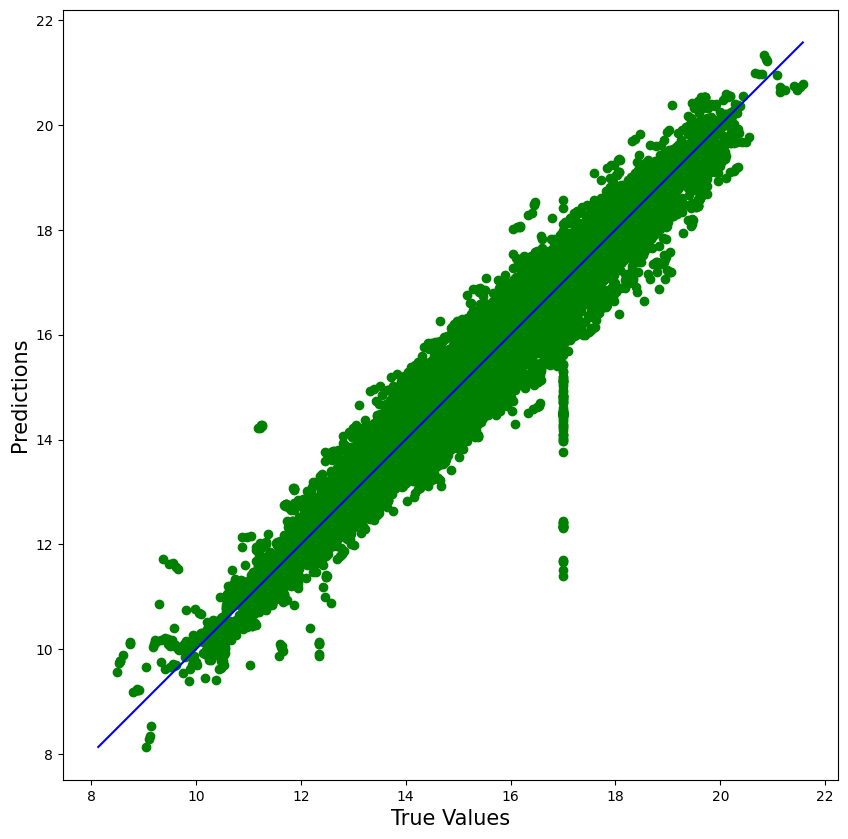

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='green')

p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Nakon izbacivanja outlier-a došlo je do smanjenja greške i na trening i na test podacima.

In [29]:
test_with_pred_df = X_test
test_with_pred_df['prediction'] = pred_test
test_with_pred_df['actual_value'] = y_test
test_with_pred_df

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
196487,17.513334,6.426667,10.133142,2.584963,6.189825,17.276606,16.891475,17.513334,7.672425,10.031494,9.854868,10.133142,2,0,0,13.393327,13.340546
196488,19.358190,8.121232,10.217958,2.321928,5.554589,19.588459,17.755533,20.557689,8.864186,10.545876,8.857981,11.684310,20,1,3,14.093359,14.087131
196489,18.156843,7.070176,0.000000,2.584963,5.285402,18.313192,16.750485,19.453325,7.787903,3.062704,0.000000,8.396605,20,3,0,16.957472,17.000558
196492,22.123921,11.037253,14.102632,2.584963,4.807355,23.120345,20.328229,25.813744,6.781360,16.038815,12.640471,18.450877,10,3,1,18.914759,18.969010
196494,18.058510,6.962990,10.694358,2.584963,5.832890,21.693196,17.069313,25.104684,8.839204,12.642179,8.353147,15.198714,20,1,2,12.956639,12.928888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245897,19.489091,7.418480,9.016808,2.807355,4.643856,18.906926,17.617274,19.527998,2.584963,10.396210,7.592457,12.136991,24,2,3,12.904055,13.384379
245898,19.103856,8.017189,10.831307,2.807355,5.087463,19.240278,17.561907,20.213334,8.005625,12.432614,10.333155,13.854771,23,1,1,15.525660,16.072572
245899,21.218798,10.132131,12.508785,2.807355,5.321928,21.845931,18.395120,23.772112,4.700440,14.775480,10.736402,16.271682,20,1,2,16.739073,16.800205
245901,19.617442,8.530775,10.945444,2.584963,5.554589,23.416360,18.060005,25.406218,3.700440,14.469762,10.288866,16.320007,24,1,2,15.093080,14.850382


#### Na osnovu grafika izdvojeni su podaci kod kojih je greška velika. Uočeno je da svi podaci imaju vrednost broja lajkova 131122.742079866, što predstavlja srednju vrednost kojom su zamenjene nedostajuće vrednosti. U nastavku će se ukloniti podaci sa ovom vrednošću i analizirati uticaj na grešku.

In [35]:
df4 = test_with_pred_df[test_with_pred_df['prediction'] < 14]
df4 = df4[df4['actual_value'] > 16]
df4

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity,prediction,actual_value
206940,17.041274,5.954607,8.906891,1.000000,6.044394,17.188044,17.041274,17.258538,6.357552,8.965784,8.906891,8.994353,25,1,3,11.403998,17.000558
207178,17.168359,6.081692,8.994353,1.584963,6.044394,17.188044,17.041274,17.258538,6.357552,8.965784,8.906891,8.994353,25,1,3,11.510414,17.000558
207412,17.217276,6.130609,8.971544,2.000000,6.044394,17.188044,17.041274,17.258538,6.357552,8.965784,8.906891,8.994353,25,1,3,11.668653,17.000558
207659,17.244262,6.157594,8.974415,2.321928,6.044394,17.188044,17.041274,17.258538,6.357552,8.965784,8.906891,8.994353,25,1,3,11.689252,17.000558
207895,17.258538,6.171871,8.980140,2.584963,6.044394,17.188044,17.041274,17.258538,6.357552,8.965784,8.906891,8.994353,25,1,3,11.708569,17.000558
234331,16.738053,5.651386,0.000000,0.000000,5.209453,16.837207,16.738053,16.891962,2.584963,0.000000,0.000000,0.000000,29,0,1,12.323036,17.000558
234562,16.799117,5.712450,0.000000,1.000000,5.209453,16.837207,16.738053,16.891962,2.584963,0.000000,0.000000,0.000000,29,0,1,12.437429,17.000558
234811,16.830391,5.743724,0.000000,1.584963,5.209453,16.837207,16.738053,16.891962,2.584963,0.000000,0.000000,0.000000,29,0,1,12.427391,17.000558
235029,16.872374,5.785707,0.000000,2.000000,5.209453,16.837207,16.738053,16.891962,2.584963,0.000000,0.000000,0.000000,29,0,1,12.407138,17.000558
235268,16.885208,5.798541,0.000000,2.321928,5.209453,16.837207,16.738053,16.891962,2.584963,0.000000,0.000000,0.000000,29,0,1,12.401242,17.000558


In [44]:
df = pd.read_csv("../data/preprocessed_data.csv")
df

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143,1.713608e+06,3958226.0,480970.0,18033.333333,45574,1471
1,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448,2.419552e+06,7003748.0,402885.0,8378.864811,27451,1324
2,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384,2.159255e+06,6582365.0,344173.0,18964.178862,207849,1764
3,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250,1.111062e+06,4274628.0,124775.0,9658.552326,41789,687
4,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415,5.394150e+05,2400821.0,182202.0,1524.144578,4867,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245898,23,563422.0,68917.0,259.068399,1822,3634.0,1,1,7,34,410,257,6.192998e+05,1215682.0,193491.0,5528.275362,14815,1290
245899,20,2440589.0,114121.0,1122.212985,5828,2833.0,1,2,7,40,1096,26,3.769471e+06,14325792.0,344733.0,28045.474138,79116,1706
245900,17,474333.0,5730.0,91.672717,343,2027.0,2,3,6,81,156,454,8.299174e+05,5190725.0,127912.0,1420.061966,9074,103
245901,24,804338.0,29540.0,369.844553,1972,6764.0,1,2,6,47,851,13,1.119507e+07,44466586.0,273277.0,22689.891304,81811,1251


In [45]:
df = df[df['likes'] != 131122.742079866]
df

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143,1.713608e+06,3958226.0,480970.0,18033.333333,45574,1471
1,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448,2.419552e+06,7003748.0,402885.0,8378.864811,27451,1324
2,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384,2.159255e+06,6582365.0,344173.0,18964.178862,207849,1764
3,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250,1.111062e+06,4274628.0,124775.0,9658.552326,41789,687
4,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415,5.394150e+05,2400821.0,182202.0,1524.144578,4867,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245898,23,563422.0,68917.0,259.068399,1822,3634.0,1,1,7,34,410,257,6.192998e+05,1215682.0,193491.0,5528.275362,14815,1290
245899,20,2440589.0,114121.0,1122.212985,5828,2833.0,1,2,7,40,1096,26,3.769471e+06,14325792.0,344733.0,28045.474138,79116,1706
245900,17,474333.0,5730.0,91.672717,343,2027.0,2,3,6,81,156,454,8.299174e+05,5190725.0,127912.0,1420.061966,9074,103
245901,24,804338.0,29540.0,369.844553,1972,6764.0,1,2,6,47,851,13,1.119507e+07,44466586.0,273277.0,22689.891304,81811,1251


In [46]:
numerical_features.append(target)
apply_log(df, numerical_features)
numerical_features.remove(target)

C:\Users\pc\AppData\Local\Temp\ipykernel_4644\3495564779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df.apply(lambda row: np.log2(row[column_name]) if row[column_name] != 0 else row[column_name], axis=1)
C:\Users\pc\AppData\Local\Temp\ipykernel_4644\3495564779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df.apply(lambda row: np.log2(row[column_name]) if row[column_name] != 0 else row[column_name], axis=1)
C:\Users\pc\AppData\Local\Temp\ipykernel_4644\349556

In [48]:
df3 = df[df['title_length'] < 6.2]
df3 = df3[df3['view_count'] < 26]
df3 = df3[df3['view_count'] > 10]
df3 = df3[df3['tags_count'] < 8.9]
df3 = df3[df3['dislikes'] < 18]
df3 = df3[df3['comment_count'] < 16]
df3

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,20.530519,17.259559,9.443852,15.107912,1958.0,1,2,0.000000,5.087463,361,7.159871,20.708606,21.916423,18.875587,14.138378,15.475923,10.522582
1,20,21.183553,17.162893,10.096886,14.014456,566.0,1,0,0.000000,5.906891,715,8.807355,21.206308,22.739696,18.620009,13.032539,14.744571,10.370687
2,24,20.959326,18.432522,9.872659,15.295661,4918.0,3,0,0.000000,5.727920,513,8.584963,21.042102,22.650175,18.392774,14.210989,17.665176,10.784635
3,10,18.922221,14.505005,7.835554,12.900678,5088.0,1,1,0.000000,5.807355,762,7.965784,20.083507,22.027367,16.928969,13.237591,15.350836,9.424166
4,26,20.100068,15.483123,9.013401,11.100662,4004.0,1,0,0.000000,5.781360,2493,8.696968,19.041036,21.195096,17.475179,10.573784,12.248817,8.584963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245897,24,19.489091,13.384379,7.418480,9.016808,3216.0,2,3,2.807355,4.643856,278,2.584963,18.906926,19.527998,17.617274,10.396210,12.136991,7.592457
245898,23,19.103856,16.072572,8.017189,10.831307,3634.0,1,1,2.807355,5.087463,410,8.005625,19.240278,20.213334,17.561907,12.432614,13.854771,10.333155
245899,20,21.218798,16.800205,10.132131,12.508785,2833.0,1,2,2.807355,5.321928,1096,4.700440,21.845931,23.772112,18.395120,14.775480,16.271682,10.736402
245901,24,19.617442,14.850382,8.530775,10.945444,6764.0,1,2,2.584963,5.554589,851,3.700440,23.416360,25.406218,18.060005,14.469762,16.320007,10.288866


In [49]:
X = df3[features]
X

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity
0,20.530519,9.443852,15.107912,0.000000,5.087463,20.708606,18.875587,21.916423,7.159871,14.138378,10.522582,15.475923,22,1,2
1,21.183553,10.096886,14.014456,0.000000,5.906891,21.206308,18.620009,22.739696,8.807355,13.032539,10.370687,14.744571,20,1,0
2,20.959326,9.872659,15.295661,0.000000,5.727920,21.042102,18.392774,22.650175,8.584963,14.210989,10.784635,17.665176,24,3,0
3,18.922221,7.835554,12.900678,0.000000,5.807355,20.083507,16.928969,22.027367,7.965784,13.237591,9.424166,15.350836,10,1,1
4,20.100068,9.013401,11.100662,0.000000,5.781360,19.041036,17.475179,21.195096,8.696968,10.573784,8.584963,12.248817,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245897,19.489091,7.418480,9.016808,2.807355,4.643856,18.906926,17.617274,19.527998,2.584963,10.396210,7.592457,12.136991,24,2,3
245898,19.103856,8.017189,10.831307,2.807355,5.087463,19.240278,17.561907,20.213334,8.005625,12.432614,10.333155,13.854771,23,1,1
245899,21.218798,10.132131,12.508785,2.807355,5.321928,21.845931,18.395120,23.772112,4.700440,14.775480,10.736402,16.271682,20,1,2
245901,19.617442,8.530775,10.945444,2.584963,5.554589,23.416360,18.060005,25.406218,3.700440,14.469762,10.288866,16.320007,24,1,2


In [50]:
y = df3[target]
y

0         17.259559
1         17.162893
2         18.432522
3         14.505005
4         15.483123
            ...    
245897    13.384379
245898    16.072572
245899    16.800205
245901    14.850382
245902    15.707009
Name: likes, Length: 203555, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((162844, 15), (40711, 15), (162844,), (40711,))

In [52]:
model = XGBRegressor(n_estimators = 20000, max_depth = 8, learning_rate = 0.01, colsample_bytree = 0.6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train, pred_test

(array([17.126465, 17.234018, 18.418726, ..., 14.505352, 19.272623,
        13.651911], dtype=float32),
 array([14.840782, 14.634266, 13.387747, ..., 16.759193, 15.035157,
        15.493675], dtype=float32))

In [54]:
print(f"Train RMSE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSE = 0.0648636586402694
Test RMSE = 0.3442708702420896


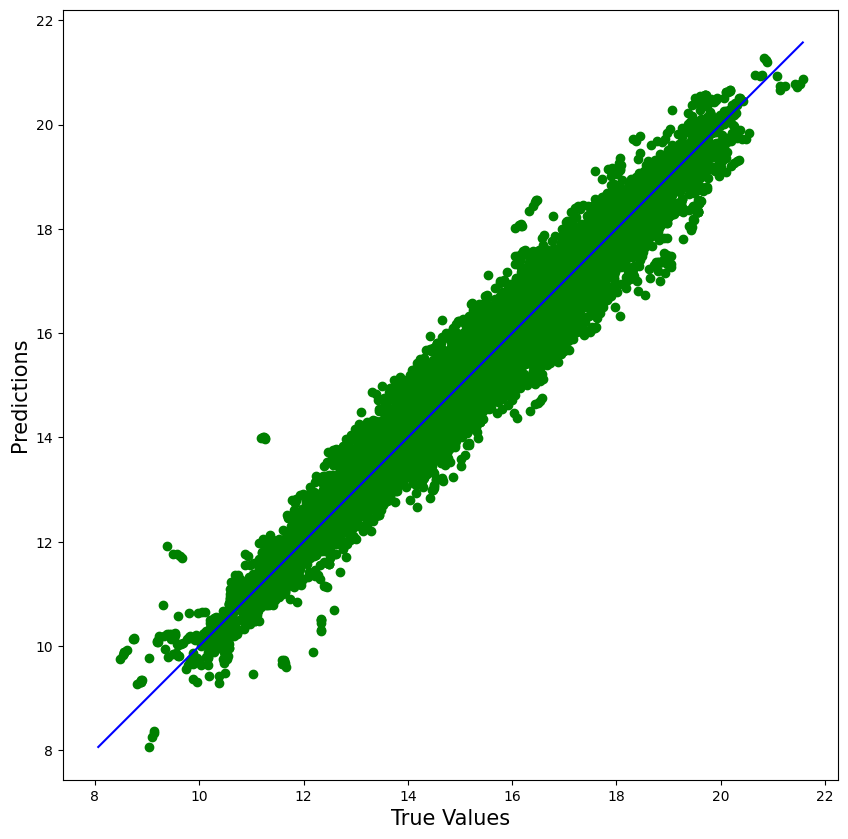

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='green')

p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Izbacivanje samo outlier-a je malo smanjilo grešku, ali izbacivanje outlier-a zajedno sa izbacivanjem podataka koji su imali nedostajuću vrednost najbolje je uticalo na rezultat i u velikoj meri smanjilo grešku.